<a href="https://colab.research.google.com/github/shivaprajapati34390-netizen/ML-project/blob/main/Amazon_Product_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiment=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
data=pd.read_csv("Reviews.csv")
print(data.head())

                                      url  \
0  https://www.amazon.co.uk/dp/B07SBX32T5   
1  https://www.amazon.co.uk/dp/B07SBX32T5   
2  https://www.amazon.co.uk/dp/B07SBX32T5   
3  https://www.amazon.co.uk/dp/B07SBX32T5   
4  https://www.amazon.co.uk/dp/B08SW434MG   

                                        product_name     reviewer_name  \
0  Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1  Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2  Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3  Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4  GUESS Women's Bradly Gymnastics Shoe, White, 7 UK         Graziella   

         review_title                                        review_text  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are very cute, but after the 2nd day...   
2        Good quality                                   

In [7]:
#  before moving forward lets take a look at some of the information needed from this data set

In [8]:
print(data.describe())

       review_rating
count    6823.000000
mean        4.132493
std         1.336969
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


In [9]:
# As this dataset is very large, it contains some missing values, so let’s remove all the rows containing the missing values:


In [10]:
data.dropna()

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25
6,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Cliente,Molto belle,"Le scarpe sono molto belle, calzano perfettamente",5.0,True,Reviewed in Italy on 8 April 2021,2 people found this helpful,deb5e278-70b5-5e2c-9ad7-93bf5c26a41d,24/12/2021 02:26:25
14,https://www.amazon.co.uk/dp/B07S1XM3L7,"adidas Women's Retrorun Shoes Running, Core Bl...",Lindsay,Perfect right outta the box,True to size. If between I'd probably go with ...,5.0,True,Reviewed in Canada on 20 October 2021,One person found this helpful,b64632c5-6f24-51eb-9275-6614fed29f1a,24/12/2021 02:26:25
17,https://www.amazon.co.uk/dp/B0125TMZGK,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",Amazon Customer,Comfortable and attractive,I have hard to fit feet and often a wide fitti...,5.0,True,Reviewed in Canada on 8 October 2018,2 people found this helpful,bce0114a-c0fe-5472-bbb8-377cb21dc853,24/12/2021 02:26:25
...,...,...,...,...,...,...,...,...,...,...,...
6805,https://www.amazon.co.uk/dp/B08GDV6DN6,adidas Zx 2k Boost Mens Fv9993 Size 11,Andrew,Awesome ! Fits like a Glove!,"Okay, Truth be told.. Originally found these U...",5.0,True,Reviewed in the United States on 12 July 2021,One person found this helpful,22824d47-4360-5aaa-96fa-8c6b5aedb0ec,24/12/2021 02:29:38
6808,https://www.amazon.co.uk/dp/B08GDV6DN6,adidas Zx 2k Boost Mens Fv9993 Size 11,Loring,They look great but...,Fits bigger than the other 4 pairs of Adidas m...,3.0,True,Reviewed in the United States on 28 April 2021,One person found this helpful,3092d09f-9f6e-51fd-a828-97b58d59de9c,24/12/2021 02:29:38
6811,https://www.amazon.co.uk/dp/B08GDV6DN6,adidas Zx 2k Boost Mens Fv9993 Size 11,Lyle Biggs,These shoes are the bomb,I never had shoes this comfy. Definitely buy a...,5.0,True,Reviewed in the United States on 16 August 2021,One person found this helpful,0f1f0492-1e18-5c7e-ad1e-066135767977,24/12/2021 02:29:38
6813,https://www.amazon.co.uk/dp/B06XFT2G2F,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",Shopper M,Great for early walkers,The only shoes (after many tries) that worked ...,5.0,True,Reviewed in the United States on 8 December 2017,One person found this helpful,9b9e6d15-a4b1-57c0-bebd-d58b115b4ada,24/12/2021 02:29:38


In [11]:
#  sentiment analysis of amazon product reviews

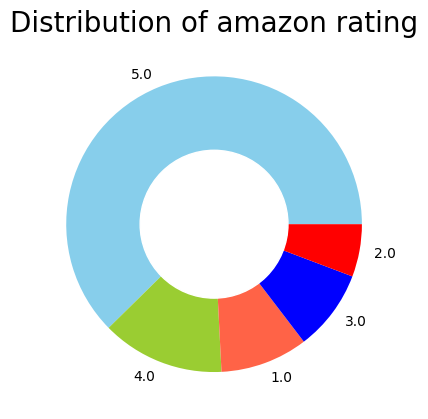

In [14]:
rating=data["review_rating"].value_counts()
numbers=rating.index
quantity=rating.values
custom_colors=["skyblue","yellowgreen",'tomato',"blue","red"]
plt.pie(quantity,labels=numbers,colors=custom_colors)
central_circle=plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=12)
plt.title("Distribution of amazon rating",fontsize=20)
plt.show()

In [15]:
# according to this fig more then half people rated the product is rating 5 so i can add the positive negative and neutral columns

In [19]:
sentiments=SentimentIntensityAnalyzer()
data["review_text"] = data["review_text"].astype(str).fillna('')
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["review_text"]]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["review_text"]]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["review_text"]]
print(data.head())

                                      url  \
0  https://www.amazon.co.uk/dp/B07SBX32T5   
1  https://www.amazon.co.uk/dp/B07SBX32T5   
2  https://www.amazon.co.uk/dp/B07SBX32T5   
3  https://www.amazon.co.uk/dp/B07SBX32T5   
4  https://www.amazon.co.uk/dp/B08SW434MG   

                                        product_name     reviewer_name  \
0  Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1  Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2  Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3  Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4  GUESS Women's Bradly Gymnastics Shoe, White, 7 UK         Graziella   

         review_title                                        review_text  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are very cute, but after the 2nd day...   
2        Good quality                                   

In [24]:
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print("Positive😊")
  elif (b>a) and (b>c):
    print("Negative😠")
  else:
    print("Neutral🙂")

sentiment_score(x,y,z)

Neutral🙂
